In [71]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<h1>Data Preprocessing</h1>

In [72]:
df = pd.read_csv('kompas100_stock_price.csv')
df

,date,ABMM,BNGA,GOTO,MBMA,SIDO,ACES,BRIS,HEAL,MDKA,...,BMRI,GGRM,MAPI,PWON,VKTR,BMTR,GJTL,MARK,SCMA,WIFI
0,"Dec 9, 2024",3540,1820,78,515,585,770,3010,1480,1920,...,6375,13650,1385,422,128,202,1160,1065,153,430
1,"Dec 6, 2024",3520,1780,77,510,580,770,2980,1480,1910,...,6225,13525,1415,426,128,198,1100,1055,142,430
2,"Dec 5, 2024",3530,1775,75,520,585,765,2970,1490,1920,...,6150,13650,1445,428,121,200,1100,1125,135,432
3,"Dec 4, 2024",3550,1760,75,530,580,770,3000,1485,1930,...,6375,13350,1435,422,129,194,1125,1010,139,428
4,"Dec 3, 2024",3480,1745,75,515,580,760,2940,1490,1860,...,6275,12675,1430,402,129,190,1110,1010,134,428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,"Dec 15, 2023",3300,1690,93,550,545,685,1700,1480,2320,...,5900,20725,1675,422,116,258,990,645,149,155
233,"Dec 14, 2023",3270,1680,94,530,555,680,1705,1465,2330,...,5950,20625,1720,420,121,256,990,615,150,158
234,"Dec 13, 2023",3220,1650,89,520,550,680,1645,1460,2290,...,5725,21000,1620,404,123,256,985,605,148,158
235,"Dec 12, 2023",3310,1660,94,540,530,685,1640,1465,2340,...,5800,20400,1615,402,121,256,950,610,150,160


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Columns: 101 entries, date to WIFI
dtypes: int64(100), object(1)
memory usage: 187.1+ KB


In [74]:
df.isnull().sum()

date    0
ABMM    0
BNGA    0
GOTO    0
MBMA    0
       ..
BMTR    0
GJTL    0
MARK    0
SCMA    0
WIFI    0
Length: 101, dtype: int64

<img src="./Screenshot 2024-12-12 091807.png">
<img src="./Screenshot 2024-12-12 091815.png">

In [75]:
def get_daily_returns(price_list):
    daily_returns = np.diff(price_list) / price_list[:-1]  
    return daily_returns

def get_expected_return(daily_returns):
    return np.mean(daily_returns)

def get_value_at_risk(daily_returns):
    return (np.mean(daily_returns) + np.std(daily_returns) * 1.645)

data = {
    "kode_saham": [],
    "expected_return": [],
    "value_at_risk": []
}

list_saham = list(df.columns[1:])

for saham in list_saham:
    daily_returns = get_daily_returns(df[saham])

    expected_return = get_expected_return(daily_returns)
    var = get_value_at_risk(daily_returns)

    data["kode_saham"].append(saham)
    data["expected_return"].append(expected_return * 237)
    data["value_at_risk"].append(var)

new_df = pd.DataFrame(data)
new_df.tail(20)

,kode_saham,expected_return,value_at_risk
80,BBYB,0.585071,0.071331
81,ESSA,-0.333320,0.045865
82,MAHA,0.151397,0.036202
83,PTPP,0.400317,0.059950
84,UNTR,-0.236420,0.025811
85,BFIN,0.258987,0.043040
86,EXCL,-0.121169,0.032323
87,MAPA,-0.173138,0.047655
88,PTRO,-1.108257,0.073870
89,UNVR,0.688797,0.043592


In [76]:
df_numeric = new_df.drop(columns=['kode_saham'])
df_numeric

,expected_return,value_at_risk
0,-0.037365,0.032725
1,-0.068703,0.024402
2,0.231635,0.055887
3,0.185326,0.056709
4,-0.062932,0.028415
...,...,...
95,0.280985,0.032438
96,-0.122327,0.044210
97,-0.513133,0.044842
98,0.044078,0.041933


In [77]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled

array([[-1.12530567e-01, -5.56905045e-01],
       [-1.95561532e-01, -1.10877825e+00],
       [ 6.00181120e-01,  9.78863156e-01],
       [ 4.77485845e-01,  1.03337572e+00],
       [-1.80269291e-01, -8.42710642e-01],
       [-1.44548430e-01, -2.78542599e-01],
       [-1.35839796e+00,  1.16474569e-02],
       [ 9.99840806e-02, -3.59531799e-01],
       [ 7.73402989e-01,  2.71844116e-01],
       [-5.91331933e-01,  5.57291443e-01],
       [ 2.75447674e-01,  7.06913825e-02],
       [-1.87891645e+00,  7.83279204e-01],
       [ 8.80289230e-01, -3.57464524e-01],
       [-7.36691274e-02, -9.40504936e-02],
       [ 1.76923013e+00, -2.06965111e-01],
       [ 2.71941519e-01,  1.45206183e+00],
       [ 2.09707933e+00,  1.84942598e+00],
       [ 6.99158936e-01,  3.85580342e-01],
       [ 1.98667141e-01, -6.31422819e-01],
       [-8.34062516e-01,  2.04008213e+00],
       [ 2.02301019e-01, -6.62569967e-01],
       [ 1.54467712e-01, -6.27519361e-01],
       [-2.25349900e-01, -9.33972285e-01],
       [ 7.

In [78]:
def kmeans_elbow_method(X):
    inertias = []
    
    k_range = range(1, 11)
    

    for k in k_range:
        kmeans = KMeans(
            n_clusters=k, 
            init='k-means++', 
            n_init=10,  
            random_state=42  
        )
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    # Plot the Elbow Curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, marker='o')
    plt.title('Elbow Method for Optimal k', fontsize=15)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

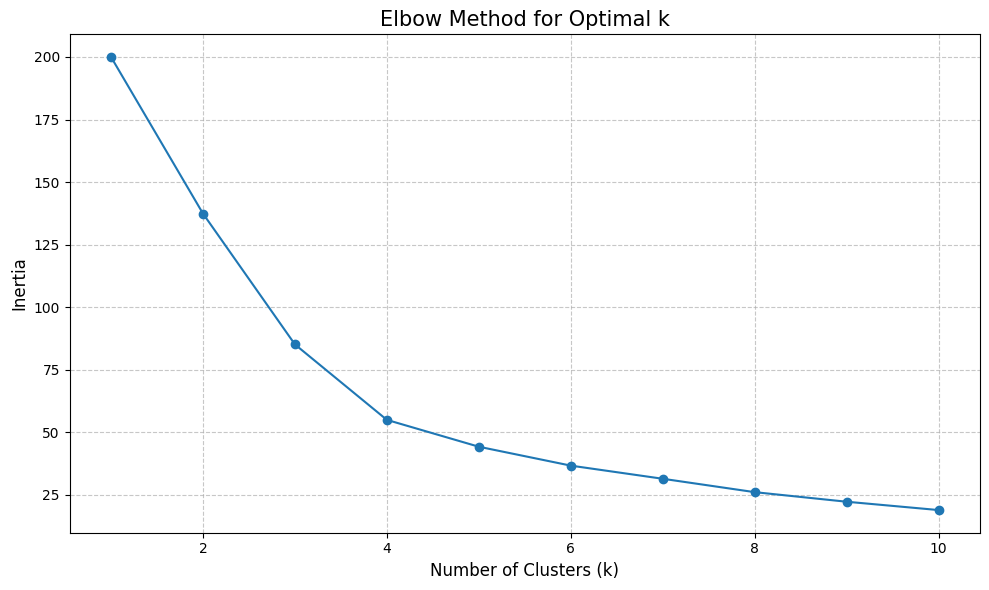

In [79]:
kmeans_elbow_method(df_scaled)

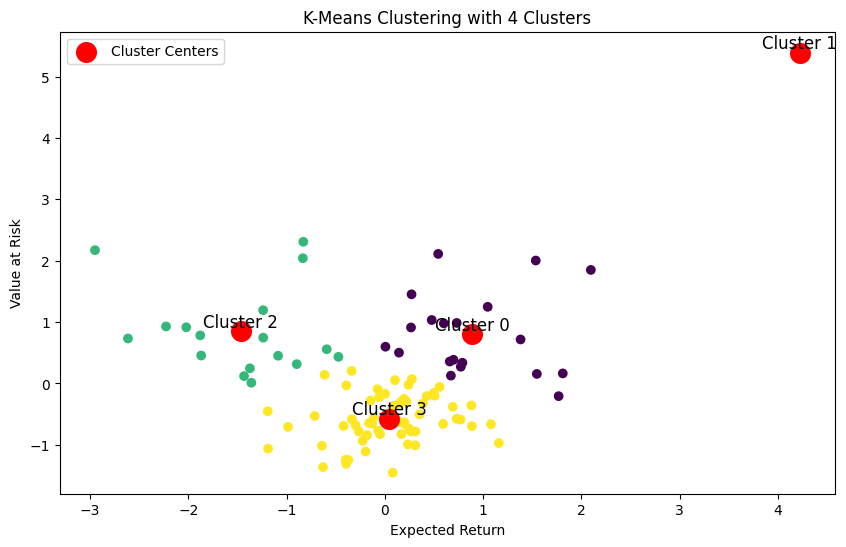

In [80]:
n_cluster = 4
kmeans = KMeans(n_clusters=n_cluster, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(df_scaled)
new_df['cluster'] = labels


# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')

# Add cluster labels
for i, center in enumerate(kmeans.cluster_centers_):
    plt.text(center[0], center[1], f'Cluster {i}', ha='center', va='bottom', fontsize=12)

plt.title(f'K-Means Clustering with {n_cluster} Clusters')
plt.xlabel('Expected Return')
plt.ylabel('Value at Risk')
plt.legend()
plt.show()

In [81]:
print('\nCluster Sizes:')
print(new_df['cluster'].value_counts())


Cluster Sizes:
cluster
3    62
0    20
2    17
1     1
Name: count, dtype: int64


In [82]:
result_df = new_df.groupby('cluster').agg({'expected_return': 'mean', 'value_at_risk': 'mean'})

result_df["expected_return"] *= 100
result_df["value_at_risk"] *= 100

result_df

,expected_return,value_at_risk
cluster,,
0,34.154497,5.317345
1,159.836597,12.238751
2,-54.794991,5.390575
3,2.252680,3.242182


In [83]:
cluster_0_df = new_df[new_df['cluster'] == 0][['kode_saham', 'expected_return', 'value_at_risk', 'cluster']]
cluster_0_df

,kode_saham,expected_return,value_at_risk,cluster
2,GOTO,0.231635,0.055887,0
3,MBMA,0.185326,0.056709,0
8,MDKA,0.297015,0.045224,0
14,SMGR,0.672872,0.038003,0
15,ADRO,0.107747,0.063024,0
16,BRPT,0.796613,0.069016,0
17,HRUM,0.268993,0.046939,0
23,MNCN,0.303192,0.046208,0
26,BTPS,0.589116,0.043460,0
31,BUKA,0.526506,0.051929,0


In [84]:
cluster_1_df = new_df[new_df['cluster'] == 1][['kode_saham', 'expected_return', 'value_at_risk', 'cluster']]
cluster_1_df = cluster_1_df.sort_values(by='expected_return', ascending=False)
cluster_1_df

,kode_saham,expected_return,value_at_risk,cluster
78,PTMP,1.598366,0.122388,1


In [85]:
cluster_2_df = new_df[new_df['cluster'] == 2][['kode_saham', 'expected_return', 'value_at_risk', 'cluster']]
cluster_2_df

,kode_saham,expected_return,value_at_risk,cluster
6,BRIS,-0.507595,0.041300,2
9,SILO,-0.218080,0.049529,2
11,BRMS,-0.704055,0.052937,2
19,SMIL,-0.309694,0.071892,2
34,SRTG,-0.461851,0.052383,2
39,SSIA,-0.757736,0.054923,2
51,DOID,-0.535672,0.042930,2
53,PANI,-0.981576,0.052173,2
54,TINS,-0.462341,0.059118,2
56,DSNG,-0.700395,0.047987,2


In [86]:
new_df[new_df['kode_saham'] == "GGRM"]

,kode_saham,expected_return,value_at_risk,cluster
91,GGRM,0.442862,0.026476,3


<h1>Evaluation</h1>

In [87]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.460


: 